# Classification

# Notebook Content
## Classification
[Overview](#Overview)<br>
[Logistic Regression Classifier](#Logistic-Regression-Classifier)<br>
[Support Vector Classifier](#Support-Vector-Classifier)<br>
[Naive Bayes Classifier](#Naive-Bayes-Classifier)<br>
[Multinomial Naive Bayes Classifier](#Multinomial-Naive-Bayes-Classifier)<br>
[Gradient Boosting Classifier](#Gradient-Boosting-Classifier)<br>
[XGBoost Classifier](#XGBoost-Classifier)<br>
[Gradient Descent](#Gradient-Descent)<br>
[Stochastic Gradient Descent](#Stochastic-Gradient-Descent)<br>
[Decision Tree](#Decision-Tree)<br>
[Random Forest Classifier](#Random-Forest-Classifier)<br>
[KNN Classifier](#KNN-Classifier)<br>
[Classifiers Report](#Classifiers-Report)<br>
## Multiclass Classification
[Multiclass Logistic Regression](#Multiclass-Logistic-Regression)<br>
[Support Vector Classifier](#Support-Vector-Classifier-for-Multiclass-classification)<br>
[Multinomial Naive Bayes Classifier](#Multinomial-Naive-Bayes-Classifier-for-multiclass-classification)<br>
[Bernoulli Naive Bayes Classifier](#Bernoulli-Naive-Bayes-Classifier-for-multiclass-classification)<br>
[Decision Tree Classifier](#Decision-Tree-Classifier-for-multiclass-classfication)<br>
[Random Forest](#Random-Forest-Classifier-for-multiple-classes)<br>
[Gradient Boosting](#Gradient-Boosting-Classifier-for-multiclass-classificaton)<br>
[XGBoost Classifier](#XGBoost-Classifier-for-multiclass-classificaton)<br>
[KNN Classifier](#KNN-Classifier-for-multiclass-classification)<br>
## Multi-label Classification
[Binary Relevance](#Binary-Relevance)<br>
[Label Powerset](#Label-Powerset)<br>
[Classifier Chains](#Classifier-Chains)<br>
## Hyperparameter Tuning
[Grid-Search](#1)<br>
[Random-Search](#2)<br>

# Overview

**Classification** is a process of categorizing a given set of data into classes. It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points.The classes are often referred to as target, label or categories. The classification predictive modelling is the task of approximating the mapping function from input variables to discrete output variables. 

The main goal is to identify which class/category the new data will fall into.

### Required libraries
The libraries that have been used in the notebook are given below. in case of any unisntalled libraries in the system please remove the specific comment and execute the code:

In [ ]:
install.packages('caTools')
install.packages("ROCR")
install.packages('glmnet')
install.packages('rpart')
install.packages('caret')
install.packages('rpart.plot')
install.packages('rattle')
install.packages('tidyverse')
install.packages('nnet')
install.packages('caret')
install.packages('e1071')
install.packages('naivebayes')
install.packages('xgboost')
install.packages('class')
install.packages('gmodels')
install.packages('fastNaiveBayes')
install.packages('utiml')
install.packages(c("mlr", "OpenML"))
install.packages("farff")

In [2]:
# Reading data
data = read.csv("dataset/pima-indians-diabetes.csv")
head(data)

,Number.of.times.pregnant,Plasma.glucose.concentration.a.2.hours.in.an.oral.glucose.tolerance.test,Diastolic.blood.pressure..mm.Hg.,Triceps.skin.fold.thickness..mm.,X2.Hour.serum.insulin..mu.U.ml.,Body.mass.index..weight.in.kg..height.in.m..2.,Diabetes.pedigree.function,Age..years.,Class.variable..0.or.1.
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# Checking null values
sum(is.na(data))

[1] 0

In [4]:
# Train Test Split
N_all = nrow(data)
N_train = round(0.75*(N_all))
N_test = N_all-N_train
data$Class.variable = as.factor(data$Class.variable)
data_train <- data[1:N_train,]
data_test <- data[(N_train+1): N_all,]
x <- data[,1:8]
y <- data[,9]

# Set labels
data_train_labels <- data[1:N_train, 1:8]
data_test_labels <- data[(N_train+1):N_all, 9]

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Logistic Regression Classifier

In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
It is used to model the probability of a certain class or event existing 
such as pass/fail, win/lose, alive/dead or healthy/sick.

In [5]:
# Loading required libraries
library(caTools)
options(warn=-1) #To supress warnings

#logistic regression model
model_logi <- glm (Class.variable ~ ., data = data_train, family = "binomial")
summary(model_logi)

Warning message:
"package 'caTools' was built under R version 3.6.3"



Call:
glm(formula = Class.variable ~ ., family = "binomial", data = data_train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients:
                                                                           Estimate
(Intercept)                                                              -2.657e+01
Number.of.times.pregnant                                                  2.522e-12
Plasma.glucose.concentration.a.2.hours.in.an.oral.glucose.tolerance.test  2.053e-13
Diastolic.blood.pressure..mm.Hg.                                          1.447e-13
Triceps.skin.fold.thickness..mm.                                          2.899e-13
X2.Hour.serum.insulin..mu.U.ml.                                          -1.459e-13
Body.mass.index..weight.in.kg..height.in.m..2.                            4.121e-14
Diabetes.pedigree.function                                                3.989e-11
Age.

In [6]:
# Predict using the model(The predictions are probabilities and have to be convered to 0 and 1)
predictions <- predict(model_logi, data = data_test, type = 'response')
predictions = ifelse(predictions >.5, 1, 0)
table(predictions[1:192], data_test$Class.variable[1:192])



   
     0  1
  0 80 43
  1 42 27

In [7]:
#confusion matrix
library(e1071)
library(caret)
options(warn=-1) #To supress warnings

confusionMatrix(as.factor(predictions[1:192]), data_test$Class.variable[1:192])

Loading required package: lattice

Loading required package: ggplot2



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 80 43
         1 42 27
                                         
               Accuracy : 0.5573         
                 95% CI : (0.484, 0.6288)
    No Information Rate : 0.6354         
    P-Value [Acc > NIR] : 0.9893         
                                         
                  Kappa : 0.0416         
                                         
 Mcnemar's Test P-Value : 1.0000         
                                         
            Sensitivity : 0.6557         
            Specificity : 0.3857         
         Pos Pred Value : 0.6504         
         Neg Pred Value : 0.3913         
             Prevalence : 0.6354         
         Detection Rate : 0.4167         
   Detection Prevalence : 0.6406         
      Balanced Accuracy : 0.5207         
                                         
       'Positive' Class : 0              
                                         

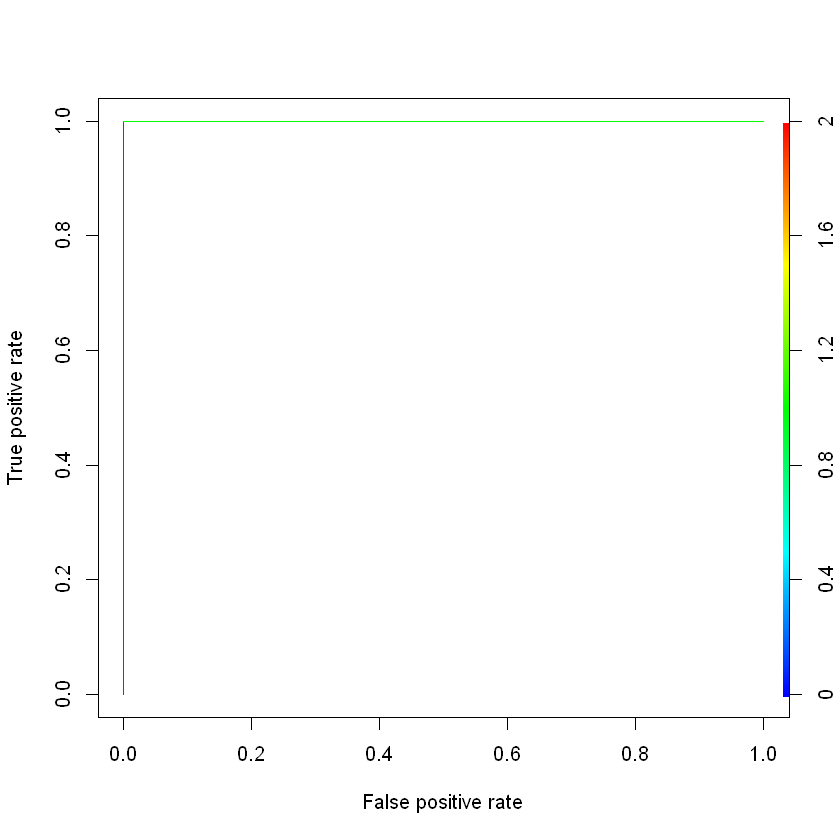

In [8]:
#ROCR Curve
library(ROCR)
options(warn=-1) #To supress warnings

ROCRpred <- prediction(predictions, data_train$Class.variable)
ROCRperf <- performance(ROCRpred, 'tpr','fpr')
plot(ROCRperf, colorize = TRUE, text.adj = c(-0.2,1.7))

In [9]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions[1:192]), data_test$Class.variable[1:192])

# Accuracy
acc_LR <- cm$overall['Accuracy']
acc_LR

Accuracy 
0.5572917

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Support Vector Classifier
The support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. New points are then added to space by predicting which category they fall into and which space they will belong to.

In [10]:
#Load Library
library(e1071)

# Fitting the model
model_svm = svm(Class.variable~.,data)

# Making 
predictions = predict(model_svm, data_test, method="C-classification", kernal="radial", 
          gamma=0.1, cost=10)

In [11]:
table(predictions, data_test$Class.variable)

           
predictions   0   1
          0 122   0
          1   0  70

In [12]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions), data_test$Class.variable)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 122   0
         1   0  70
                                    
               Accuracy : 1         
                 95% CI : (0.981, 1)
    No Information Rate : 0.6354    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.6354    
         Detection Rate : 0.6354    
   Detection Prevalence : 0.6354    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

In [13]:
# Accuracy
acc_SVC <- cm$overall['Accuracy']
acc_SVC

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Naive Bayes Classifier
It is based on Bayes’s theorem which gives an assumption of independence among predictors. A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [14]:
# Fit NB model
model_NBC=naiveBayes(x, as.factor(y))
print(model_NBC)


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = x, y = as.factor(y))

A-priori probabilities:
as.factor(y)
        0         1 
0.6510417 0.3489583 

Conditional probabilities:
            Number.of.times.pregnant
as.factor(y)     [,1]     [,2]
           0 3.298000 3.017185
           1 4.865672 3.741239

            Plasma.glucose.concentration.a.2.hours.in.an.oral.glucose.tolerance.test
as.factor(y)     [,1]     [,2]
           0 109.9800 26.14120
           1 141.2575 31.93962

            Diastolic.blood.pressure..mm.Hg.
as.factor(y)     [,1]     [,2]
           0 68.18400 18.06308
           1 70.82463 21.49181

            Triceps.skin.fold.thickness..mm.
as.factor(y)     [,1]     [,2]
           0 19.66400 14.88995
           1 22.16418 17.67971

            X2.Hour.serum.insulin..mu.U.ml.
as.factor(y)     [,1]      [,2]
           0  68.7920  98.86529
           1 100.3358 138.68912

            Body.mass.index..weight.in.kg..height.in.m..2.
as.fa

In [15]:
# Predict using the model
predictions <- predict(model_NBC, data_test)

In [16]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions), data_test$Class.variable)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 103  25
         1  19  45
                                          
               Accuracy : 0.7708          
                 95% CI : (0.7048, 0.8283)
    No Information Rate : 0.6354          
    P-Value [Acc > NIR] : 3.901e-05       
                                          
                  Kappa : 0.4962          
                                          
 Mcnemar's Test P-Value : 0.451           
                                          
            Sensitivity : 0.8443          
            Specificity : 0.6429          
         Pos Pred Value : 0.8047          
         Neg Pred Value : 0.7031          
             Prevalence : 0.6354          
         Detection Rate : 0.5365          
   Detection Prevalence : 0.6667          
      Balanced Accuracy : 0.7436          
                                          
       'Positive' Class : 0               
                              

In [17]:
# Accuracy
acc_NBC <- cm$overall['Accuracy']
acc_NBC

Accuracy 
0.7708333

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Multinomial Naive Bayes Classifier

In [18]:
# Multinomial Naive Bayes Classifier

# Load required libraries
library(naivebayes)
options(warn=-1) #To supress warnings

# Fit the model
model_MNBC <- multinomial_naive_bayes(x, as.factor(y))

naivebayes 0.9.7 loaded



In [19]:
# Predict using the model
predictions <- predict(model_MNBC, newdata = data.matrix(data_test), type = "class") 
options(warn=-1) #To supress warnings


In [20]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions), data_test$Class.variable)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 76 41
         1 46 29
                                          
               Accuracy : 0.5469          
                 95% CI : (0.4736, 0.6187)
    No Information Rate : 0.6354          
    P-Value [Acc > NIR] : 0.9952          
                                          
                  Kappa : 0.0367          
                                          
 Mcnemar's Test P-Value : 0.6680          
                                          
            Sensitivity : 0.6230          
            Specificity : 0.4143          
         Pos Pred Value : 0.6496          
         Neg Pred Value : 0.3867          
             Prevalence : 0.6354          
         Detection Rate : 0.3958          
   Detection Prevalence : 0.6094          
      Balanced Accuracy : 0.5186          
                                          
       'Positive' Class : 0               
                                    

In [21]:
acc_MNB <- cm$overall['Accuracy']
acc_MNB

Accuracy 
0.546875

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Gradient Boosting Classifier
Gradient Boost builds an additive model in a forward stage-wise fashion. It allows for the optimization of arbitrary differentiable loss functions. 

Binary classification is a special case where only a single regression tree is induced.

Loaded gbm 2.1.5



,var,rel.inf
,<fct>,<dbl>
Class.variable..0.or.1.,Class.variable..0.or.1.,1.000000e+02
Plasma.glucose.concentration.a.2.hours.in.an.oral.glucose.tolerance.test,Plasma.glucose.concentration.a.2.hours.in.an.oral.glucose.tolerance.test,2.071850e-27
Body.mass.index..weight.in.kg..height.in.m..2.,Body.mass.index..weight.in.kg..height.in.m..2.,1.581103e-27
Triceps.skin.fold.thickness..mm.,Triceps.skin.fold.thickness..mm.,1.064799e-27
Diastolic.blood.pressure..mm.Hg.,Diastolic.blood.pressure..mm.Hg.,1.051920e-27
Diabetes.pedigree.function,Diabetes.pedigree.function,1.005697e-27
X2.Hour.serum.insulin..mu.U.ml.,X2.Hour.serum.insulin..mu.U.ml.,6.559359e-28
Age..years.,Age..years.,5.991943e-28
Number.of.times.pregnant,Number.of.times.pregnant,2.303111e-28


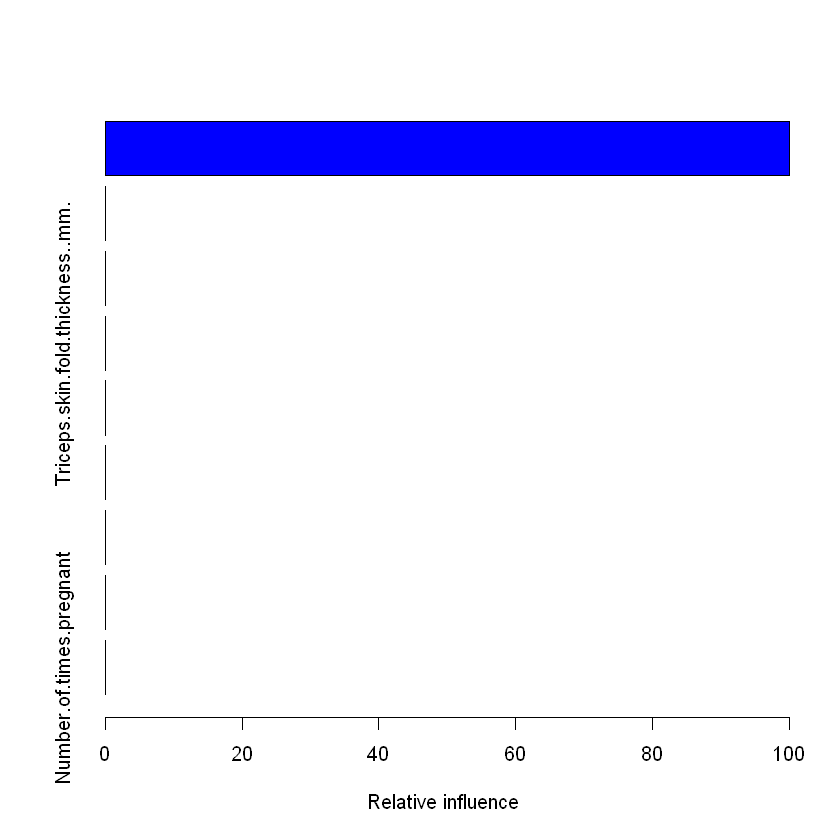

In [22]:
# Load the required libraries
library(gbm)
options(warn=-1) #To supress warnings 

# Fit the model
model_gbm = gbm(Class.variable ~ . ,data = data_train,  distribution = "gaussian",n.trees = 50,
                  shrinkage = 0.01, interaction.depth = 4)

#variance importance plt
summary(model_gbm) 

In [23]:
#Generating a Prediction matrix for each Tree
predictions <- predict(model_gbm, data_test, n.trees = 50)

In [24]:
# Predict using the model(The predictions are probabilities and have to be convered to 0 and 1)
predictions = ifelse(predictions >1.5, 1, 0)
table(data_test$Class.variable, predictions)

   predictions
      0   1
  0 122   0
  1   0  70

In [25]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions), data_test$Class.variable)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 122   0
         1   0  70
                                    
               Accuracy : 1         
                 95% CI : (0.981, 1)
    No Information Rate : 0.6354    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.6354    
         Detection Rate : 0.6354    
   Detection Prevalence : 0.6354    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

In [26]:
# Accuracy
acc_GBC <- cm$overall['Accuracy']
acc_GBC

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
Rather than training all the models in isolation of one another, boosting trains models in succession
with each new model being trained to correct the errors made by the previous ones

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes.
We should use this algorithm when we require fast and accurate predictions after the model is deployed

In [27]:
diabetes = read.csv("dataset/pima-indians-diabetes.csv")

In [28]:
indexes = createDataPartition(diabetes$Class.variable, p=.9, list=F)
train = diabetes[indexes, ]
test = diabetes[-indexes, ]

In [29]:
train_x = data.matrix(train[,-9])
train_y = train[,9]
 
test_x = data.matrix(test[,-9])
test_y = test[,9]

In [30]:
library(xgboost)

xgb_train = xgb.DMatrix(data=train_x, label=train_y)
xgb_test = xgb.DMatrix(data=test_x, label=test_y)

In [31]:
xgbc = xgboost(data=xgb_train, max.depth=3, nrounds=10, objective="binary:logistic")

[1]	train-error:0.225434 
[2]	train-error:0.210983 
[3]	train-error:0.197977 
[4]	train-error:0.200867 
[5]	train-error:0.189306 
[6]	train-error:0.192197 
[7]	train-error:0.189306 
[8]	train-error:0.196532 
[9]	train-error:0.189306 
[10]	train-error:0.187861 


In [33]:
pred = predict(xgbc, xgb_test)

In [34]:
# Predict using the model(The predictions are probabilities and have to be convered to 0 and 1)
prediction <- as.numeric(pred > 0.5)

In [35]:
# Confusion Matrix
cm = confusionMatrix(as.factor(test_y), as.factor(prediction))
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48  6
         1  8 14
                                          
               Accuracy : 0.8158          
                 95% CI : (0.7103, 0.8955)
    No Information Rate : 0.7368          
    P-Value [Acc > NIR] : 0.07227         
                                          
                  Kappa : 0.5398          
                                          
 Mcnemar's Test P-Value : 0.78927         
                                          
            Sensitivity : 0.8571          
            Specificity : 0.7000          
         Pos Pred Value : 0.8889          
         Neg Pred Value : 0.6364          
             Prevalence : 0.7368          
         Detection Rate : 0.6316          
   Detection Prevalence : 0.7105          
      Balanced Accuracy : 0.7786          
                                          
       'Positive' Class : 0               
                                    

In [36]:
# Accuracy
acc_xgb <- cm$overall['Accuracy']
acc_xgb

Accuracy 
0.8157895

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

In [110]:
# Loading required libraries
library(gradDescent)
options(warn=-1)

data = read.csv("dataset/pima-indians-diabetes.csv")
#winedata is scaled and then split
featureScalingResult <- varianceScaling(data)
splitedDataset <- splitData(data)

# # Fit the train from splitted dataset data to GD model
model <- GD(splitedDataset$dataTrain)

In [38]:
print(model)

             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 6.087171e+32 2.419577e+33 7.775144e+34 4.345856e+34 1.423202e+34
             [,6]         [,7]         [,8]         [,9]
[1,] 7.367903e+34 1.982659e+34 3.012465e+32 2.060119e+34


In [39]:
# Test data input
dataTestInput <- (splitedDataset$dataTest)[,1:ncol(splitedDataset$dataTest)-1]

# Predict using linear model
predictions <- prediction(model, dataTestInput)
# predictions

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Stochastic Gradient Descent
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. 
Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.


In [40]:
# Fitting the model
SGDmodel <- SGD(splitedDataset$dataTrain)

#show result
print(SGDmodel)

             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 2.042017e+30 1.430119e+31 1.653377e+32 1.592854e+32 8.172105e+31
             [,6]         [,7]         [,8]         [,9]
[1,] 9.806526e+31 9.537106e+31 5.328926e+29 8.577883e+31


In [41]:
# Test data input
dataTestInput <- (splitedDataset$dataTest)[,1:ncol(splitedDataset$dataTest)-1]

# Predict using model
predictions <- prediction(model, dataTestInput)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Decision Tree
The decision tree algorithm builds the classification model in the form of a tree structure. 
It utilizes the if-then rules which are equally exhaustive and mutually exclusive in classification.

We can use decision tree when there are missing values in the data and when pre processing time is to be reduced as it does not require pre processing

In [108]:
#Loading libraries
library(rpart,quietly = TRUE)
#library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)

#building the classification tree with rpart
library(rpart)
options(warn=-1)

model_dt <- rpart(Class.variable~.,
                data=data_train,
                method = "class")

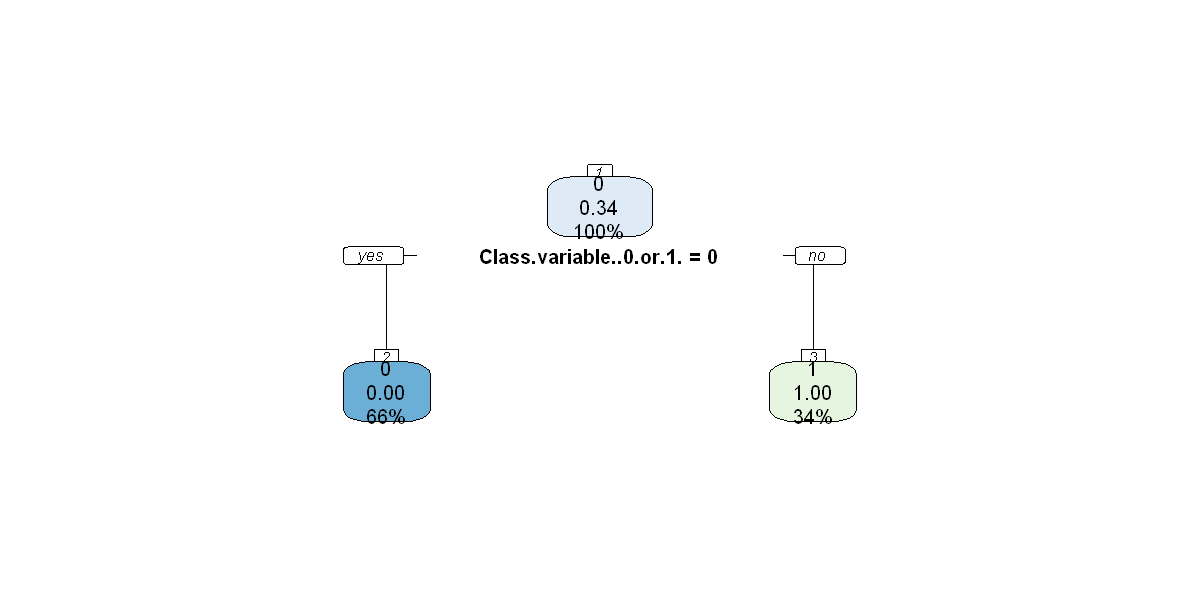

In [109]:
# Visualize the decision tree with rpart.plot
library(rpart.plot)
rpart.plot(model_dt, nn=TRUE)

In [44]:
#Testing the model
predictions <- predict(model_dt, data_test, type="class")

In [45]:
#confusion matrix
library(e1071)
library(caret)
cm <- confusionMatrix(as.factor(predictions), data_test$Class.variable)
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 122   0
         1   0  70
                                    
               Accuracy : 1         
                 95% CI : (0.981, 1)
    No Information Rate : 0.6354    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        
                                    
            Sensitivity : 1.0000    
            Specificity : 1.0000    
         Pos Pred Value : 1.0000    
         Neg Pred Value : 1.0000    
             Prevalence : 0.6354    
         Detection Rate : 0.6354    
   Detection Prevalence : 0.6354    
      Balanced Accuracy : 1.0000    
                                    
       'Positive' Class : 0         
                                    

In [46]:
acc_dt <- cm$overall['Accuracy']
acc_dt

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Random Forest Classifier
Random forest are an ensemble learning method.
It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees.
A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature.
The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain.

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:rattle':

    importance


The following object is masked from 'package:ggplot2':

    margin




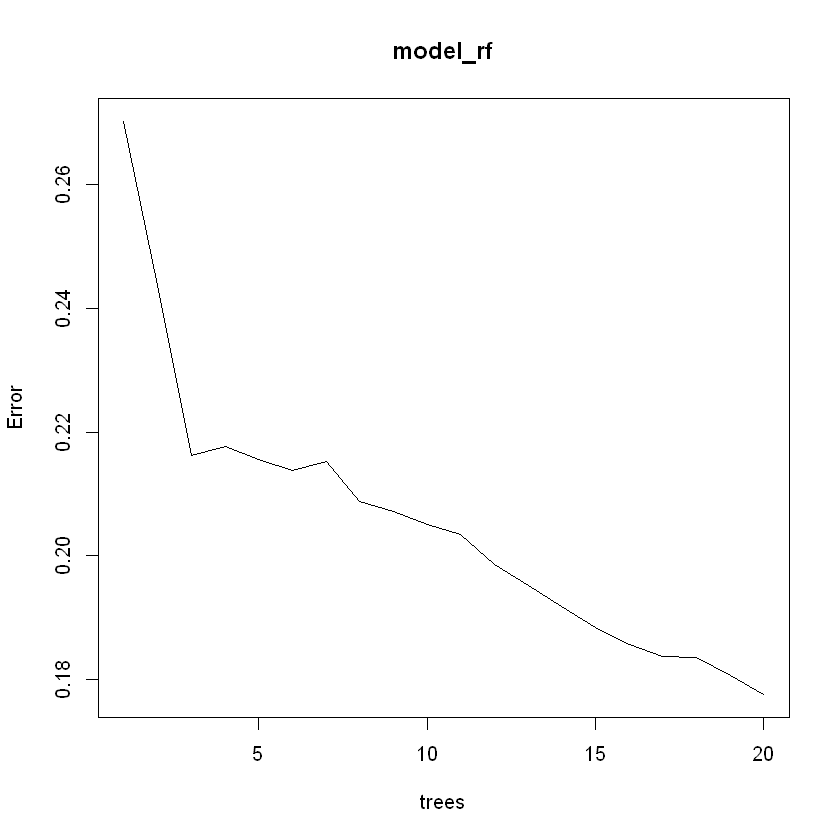

In [47]:
# Loading required libraries
library(randomForest)
options(warn=-1) #To supress warnings

# Fitting the model
model_rf = randomForest(x, y, ntree = 20, method="class")

# Plotting rf
plot(model_rf)

In [60]:
# Predict using the model
predictions <- predict(model_rf, data_test)

In [58]:
# Accuracy
acc_rf <- cm$overall['Accuracy']
acc_rf

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## KNN Classifier
It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space
To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors

We should use KNN when the dataset is small and speed is a priority (real-time)

In [62]:
library(class)
predictions <- knn(train = data_train, test = data_test, cl = data_train$Class.variable, k=10)

In [63]:
library(gmodels)
CrossTable(x = data_test$Class.variable, y = predictions, prop.chisq=FALSE )


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  192 

 
                         | predictions 
data_test$Class.variable |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |       103 |        19 |       122 | 
                         |     0.844 |     0.156 |     0.635 | 
                         |     0.780 |     0.317 |           | 
                         |     0.536 |     0.099 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        29 |        41 |        70 | 
                         |     0.414 |     0.586 |     0.365 | 
                         |     0.220 |     0.683 |           | 
                         |     0.151 |     0.214 |           | 
-------------------------|---

In [64]:
# Confusion Matrix
cm <- confusionMatrix(data_test$Class.variable, as.factor(predictions))
cm

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 103  19
         1  29  41
                                          
               Accuracy : 0.75            
                 95% CI : (0.6826, 0.8096)
    No Information Rate : 0.6875          
    P-Value [Acc > NIR] : 0.03474         
                                          
                  Kappa : 0.4435          
                                          
 Mcnemar's Test P-Value : 0.19393         
                                          
            Sensitivity : 0.7803          
            Specificity : 0.6833          
         Pos Pred Value : 0.8443          
         Neg Pred Value : 0.5857          
             Prevalence : 0.6875          
         Detection Rate : 0.5365          
   Detection Prevalence : 0.6354          
      Balanced Accuracy : 0.7318          
                                          
       'Positive' Class : 0               
                              

In [65]:
# Accuracy
acc_knn <- cm$overall['Accuracy']
acc_knn

Accuracy 
    0.75

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Classifiers Report

In [66]:
Accuracy_Score = c(acc_LR, acc_SVC, acc_NBC, acc_MNB, acc_GBC, acc_xgb, acc_dt, acc_rf, acc_knn)
Algorithm = c('Logistic Regression','SVM','Naive Bayes',
              'multinomial Naive Bayes','Gradient Boost', 'XGBoost','Decision Tree', 'Random Forest', 'KNN')
report = data.frame(Algorithm,Accuracy_Score)
report

Algorithm,Accuracy_Score
<fct>,<dbl>
Logistic Regression,0.5572917
SVM,1.0000000
Naive Bayes,0.7708333
multinomial Naive Bayes,0.5468750
Gradient Boost,1.0000000
XGBoost,0.8157895
Decision Tree,1.0000000
Random Forest,1.0000000
KNN,0.7500000


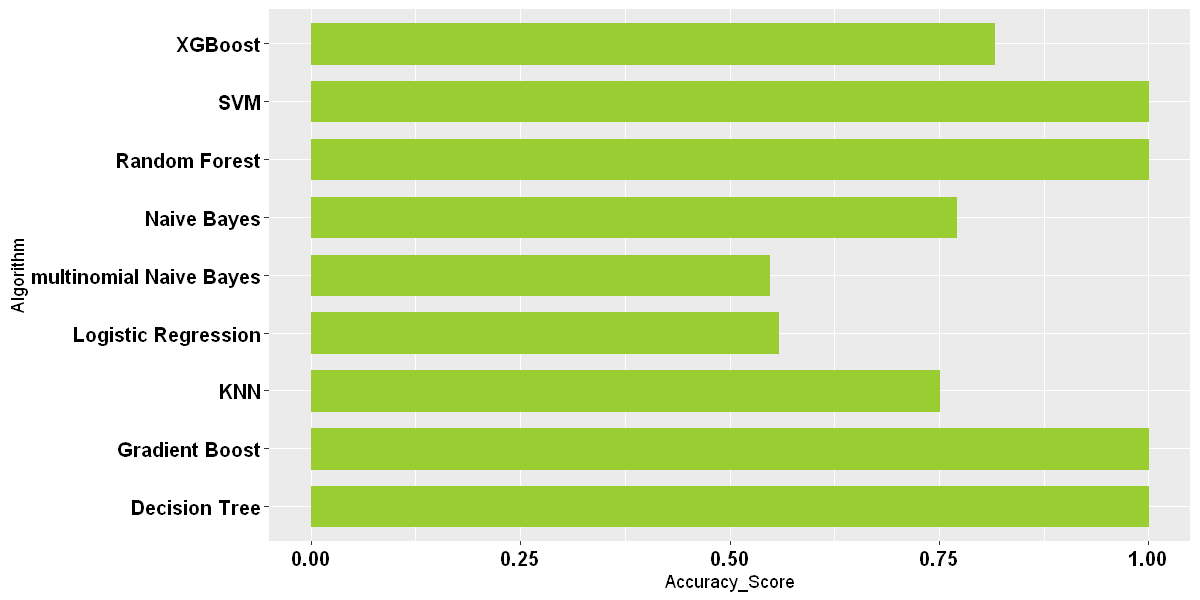

In [107]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=5)
ggplot(data=report, aes(x=Algorithm, y=Accuracy_Score))+geom_bar(position="dodge",stat="identity",width=0.7,color="yellowgreen",fill="yellowgreen") +
  coord_flip() +theme(axis.text.x = element_text(face="bold", color="black",
                                                 size=12, angle=0),
                      axis.text.y = element_text(face="bold", color="black",
                                                 size=12, angle=0))

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Multiclass classification using the different algorithms

We first import the dataset for multiclass classification. We will be using the fruit dataset for classification of fruits on the basis of the features such as mass, height, etc that can be seen in the dataframe below.<br><br>
Dataser Link: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt

In [68]:
# Read the dataset
fruit = read.csv('dataset/classification_fruit.csv')

# Splitting the data to train and test
fruit =  subset(fruit, select = -(fruit_subtype))
fruit =  subset(fruit, select = -(fruit_name))
fruit$fruit_label = as.factor(fruit$fruit_label)
class(fruit$fruit_label)
alpha=0.8
d = sort(sample(nrow(fruit), nrow(fruit)*alpha))
train = fruit[d,]
test = fruit[-d,]

[1] "factor"

## Multiclass Logistic Regression

Multinomial logistic regression is used when the dependent variable in question is nominal (equivalently categorical, meaning that it falls into any one of a set of categories that cannot be ordered in any meaningful way) and for which there are more than two categories.

Multinomial logistic regression is known by a variety of other names, including polytomous LR,[2][3] multiclass LR, softmax regression, multinomial logit (mlogit), the maximum entropy (MaxEnt) classifier

In [69]:
# Loading required libraries
library(caTools)
library(nnet)
options(warn=-1) #To supress warnings

# Fitting the data to LR model
glm.fit=nnet::multinom(fruit_label~., data=train,)
summary(glm.fit)

# weights:  24 (15 variable)
initial  value 65.155835 
iter  10 value 26.226668
iter  20 value 16.660371
iter  30 value 16.243773
iter  40 value 16.140047
iter  50 value 16.129797
iter  60 value 16.126427
iter  70 value 16.124328
iter  80 value 16.123981
iter  90 value 16.123631
final  value 16.123483 
converged


Call:
nnet::multinom(formula = fruit_label ~ ., data = train)

Coefficients:
  (Intercept)        mass      width      height color_score
2  10.7392651 -0.53124450   6.319967 -0.06074396    9.254836
3   6.4114106  0.02092958  -3.800922  3.26454808   -8.448130
4   0.7842907 -0.38955765 -19.703025 24.57676129   -3.615640

Std. Errors:
   (Intercept)       mass      width     height color_score
2  0.010421441 1.17367350 0.07085384 0.06421066 0.008028951
3 14.873963757 0.02540327 1.86710491 1.62918433 5.791412676
4  0.005496292 0.19608025 0.03444060 0.01665178 0.004448112

Residual Deviance: 32.24697 
AIC: 62.24697 

In [70]:
# Predict using the model
predictions = predict(glm.fit,test)

In [71]:
# Confusion Matrix
cm <- confusionMatrix(predictions,test$fruit_label)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 0 0
         2 0 1 0 0
         3 0 0 4 0
         4 0 0 0 5

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.7354, 1)
    No Information Rate : 0.4167     
    P-Value [Acc > NIR] : 2.738e-05  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000  1.00000   1.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000
Pos Pred Value         1.0000  1.00000   1.0000   1.0000
Neg Pred Value         1.0000  1.00000   1.0000   1.0000
Prevalence             0.1667  0.08333   0.3333   0.4167
Detection Rate         0.1667  0.08333   0.3333   0.4167
Detection Prevalence   0.1667  0.08333   0.3333   0.4167
Balanced Ac

In [72]:
# Accuracy
mc_acc_LR <- cm$overall['Accuracy']
mc_acc_LR

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Support Vector Classifier for Multiclass classification
LinearSVC implement the “one-versus-one” approach for multi-class classification.
In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes.

In [73]:
#Load Library
library(e1071)
options(warn=-1) #To supress warnings

# Fit the data to SVC
svm <- svm(fruit_label~., data=train, 
          method="C-classification", kernal="radial", 
          gamma=0.1, cost=10)

In [74]:
# Predict using the model
predictions <- predict(svm, test)

# Accuracy and other metrics
cm <- confusionMatrix(predictions, test$fruit_label)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 0 0
         2 0 1 0 0
         3 0 0 4 0
         4 0 0 0 5

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.7354, 1)
    No Information Rate : 0.4167     
    P-Value [Acc > NIR] : 2.738e-05  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000  1.00000   1.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000
Pos Pred Value         1.0000  1.00000   1.0000   1.0000
Neg Pred Value         1.0000  1.00000   1.0000   1.0000
Prevalence             0.1667  0.08333   0.3333   0.4167
Detection Rate         0.1667  0.08333   0.3333   0.4167
Detection Prevalence   0.1667  0.08333   0.3333   0.4167
Balanced Ac

In [75]:
# Accuracy
mc_acc_SVC <- cm$overall['Accuracy']
mc_acc_SVC

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Multinomial Naive Bayes Classifier for multiclass classification
It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

In [76]:
# required library
library(naivebayes)
options(warn=-1) #To supress warnings

# Fitting the data to Navie Bayes Classifier
Naive_Bayes_Model=naiveBayes(fruit_label~., data=train)
Naive_Bayes_Model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         1          2          3          4 
0.36170213 0.08510638 0.31914894 0.23404255 

Conditional probabilities:
   mass
Y       [,1]     [,2]
  1 166.8235 10.81801
  2  82.5000  3.00000
  3 176.6667 55.51662
  4 157.4545 39.44709

   width
Y       [,1]      [,2]
  1 7.464706 0.3639045
  2 5.975000 0.1707825
  3 7.380000 0.6794956
  4 6.618182 0.6569904

   height
Y       [,1]      [,2]
  1 7.347059 0.3002450
  2 4.475000 0.2061553
  3 7.766667 0.6672616
  4 9.100000 1.0779610

   color_score
Y        [,1]        [,2]
  1 0.7741176 0.128162925
  2 0.7925000 0.017078251
  3 0.7720000 0.031441556
  4 0.7154545 0.009341987


In [77]:
# Predict using the model
predictions = predict(Naive_Bayes_Model, test)

In [78]:
# Accuracy and other metrics
cm <- confusionMatrix(predictions, test$fruit_label)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 1 0
         2 0 1 0 0
         3 0 0 3 1
         4 0 0 0 4

Overall Statistics
                                          
               Accuracy : 0.8333          
                 95% CI : (0.5159, 0.9791)
    No Information Rate : 0.4167          
    P-Value [Acc > NIR] : 0.00403         
                                          
                  Kappa : 0.7624          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000  1.00000   0.7500   0.8000
Specificity            0.9000  1.00000   0.8750   1.0000
Pos Pred Value         0.6667  1.00000   0.7500   1.0000
Neg Pred Value         1.0000  1.00000   0.8750   0.8750
Prevalence             0.1667  0.08333   0.3333   0.4167
Detection Rate         0.1667  0.08333   0.2500   0.3333
Detection Prevalence   

In [79]:
mc_acc_NB <- cm$overall['Accuracy']
mc_acc_NB

Accuracy 
0.8333333

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Bernoulli Naive Bayes Classifier for multiclass classification
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input

In [80]:
# Define X_train as matrix
X_train_mat = as.matrix(train[-1])
X_test = test[-1]
y_train = train$fruit_label
y_test = test$fruit_label
class(y_train)
class(X_train_mat)

[1] "factor"

[1] "matrix"

In [81]:
# requied library
library(fastNaiveBayes)
options(warn=-1) #To supress warnings

# Train the Bernoulli Naive Bayes
bnb <- fastNaiveBayes(x = X_train_mat, y = y_train, laplace = 1)
summary(bnb)

             Length Class  Mode     
models         2    -none- list     
n              4    -none- numeric  
obs            1    -none- numeric  
priors         0    -none- NULL     
names          4    -none- character
distribution   2    -none- list     
levels         4    -none- character
laplace        1    -none- numeric  
x            188    -none- numeric  
y             47    factor numeric  

In [82]:
# Predict using the model
predictions = predict(bnb, as.matrix(X_test))

In [83]:
# Confusion Matrix
cm <- confusionMatrix(predictions, y_test)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 0 0
         2 0 1 0 0
         3 0 0 4 1
         4 0 0 0 4

Overall Statistics
                                          
               Accuracy : 0.9167          
                 95% CI : (0.6152, 0.9979)
    No Information Rate : 0.4167          
    P-Value [Acc > NIR] : 0.0004874       
                                          
                  Kappa : 0.8788          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000  1.00000   1.0000   0.8000
Specificity            1.0000  1.00000   0.8750   1.0000
Pos Pred Value         1.0000  1.00000   0.8000   1.0000
Neg Pred Value         1.0000  1.00000   1.0000   0.8750
Prevalence             0.1667  0.08333   0.3333   0.4167
Detection Rate         0.1667  0.08333   0.3333   0.3333
Detection Prevalence   

In [84]:
# Accuracy
mc_acc_BNB <- cm$overall['Accuracy']
mc_acc_BNB

Accuracy 
0.9166667

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Decision Tree Classifier for multiclass classfication
Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split.

In [85]:
# Loading required libraries
library('rpart')
options(warn=-1) #To supress warnings

# Fit the data to the model
modfit.rpart <- rpart(fruit_label ~ ., data=train, method="class")

In [86]:
# Predict the testing set with the trained model 
pred_decision <- predict(modfit.rpart, test, type = "class")

In [87]:
# Confusion Matrix
cm <- confusionMatrix(pred_decision, test$fruit_label)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 0 0 0 0
         2 1 1 0 0
         3 1 0 1 1
         4 0 0 3 4

Overall Statistics
                                          
               Accuracy : 0.5             
                 95% CI : (0.2109, 0.7891)
    No Information Rate : 0.4167          
    P-Value [Acc > NIR] : 0.3798          
                                          
                  Kappa : 0.2421          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.0000  1.00000  0.25000   0.8000
Specificity            1.0000  0.90909  0.75000   0.5714
Pos Pred Value            NaN  0.50000  0.33333   0.5714
Neg Pred Value         0.8333  1.00000  0.66667   0.8000
Prevalence             0.1667  0.08333  0.33333   0.4167
Detection Rate         0.0000  0.08333  0.08333   0.3333
Detection Prevalence   

In [88]:
# Accuracy
mc_acc_dt <- cm$overall['Accuracy']
mc_acc_dt

Accuracy 
     0.5

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Random Forest Classifier for multiple classes
Random forest are an ensemble learning method. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees. A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain

In [89]:
# Loading required libraries
library('randomForest')
options(warn=-1) #To supress warnings

# Training with Random forest model
modfit.rf <- randomForest(fruit_label ~., data=train)

In [90]:
# Predict the testing set with the trained model
predictions <- predict(modfit.rf, test, type = "class")

In [91]:
# Confusion Matrix
cm <- confusionMatrix(predictions, test$fruit_label)
cm

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 0 0
         2 0 1 0 0
         3 0 0 4 0
         4 0 0 0 5

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.7354, 1)
    No Information Rate : 0.4167     
    P-Value [Acc > NIR] : 2.738e-05  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            1.0000  1.00000   1.0000   1.0000
Specificity            1.0000  1.00000   1.0000   1.0000
Pos Pred Value         1.0000  1.00000   1.0000   1.0000
Neg Pred Value         1.0000  1.00000   1.0000   1.0000
Prevalence             0.1667  0.08333   0.3333   0.4167
Detection Rate         0.1667  0.08333   0.3333   0.4167
Detection Prevalence   0.1667  0.08333   0.3333   0.4167
Balanced Ac

In [92]:
# Accuracy
mc_acc_rf <- cm$overall['Accuracy']
mc_acc_rf

Accuracy 
       1

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Gradient Boosting Classifier for multiclass classificaton
GB builds an additive model in a forward stage-wise fashion It allows for the optimization of arbitrary differentiable loss functions. Binary classification is a special case where only a single regression tree is induced.

In [93]:
# Let us import the iris dataset
library(datasets)
data(iris)
summary(iris)
options(warn=-1) #To supress warnings


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [94]:
#  Splitting the dataset
indexes = createDataPartition(iris$Species, p = .90, list = F)
train = iris[indexes, ]
test = iris[-indexes, ]

In [95]:
# Import the required libraries
library(gbm)
library(caret)
options(warn=-1) #To supress warnings

# Fitting the gbm model
mod_gbm = gbm(Species ~.,
              data = train,
              distribution = "multinomial",
              cv.folds = 10,
              shrinkage = .01,
              n.minobsinnode = 10,
              n.trees = 200)

# print the model
print(mod_gbm)

gbm(formula = Species ~ ., distribution = "multinomial", data = train, 
    n.trees = 200, n.minobsinnode = 10, shrinkage = 0.01, cv.folds = 10)
A gradient boosted model with multinomial loss function.
200 iterations were performed.
The best cross-validation iteration was 200.
There were 4 predictors of which 4 had non-zero influence.


In [96]:
# Predict using the model(The predictions are probabilities and have to be convered to 0 and 1)
pred = predict.gbm(object = mod_gbm,
                    newdata = test,
                    n.trees = 200,
                    type = "response")

In [97]:
labels = colnames(pred)[apply(pred, 1, which.max)]
result = data.frame(test$Species, labels)
print(result)

   test.Species     labels
1        setosa     setosa
2        setosa     setosa
3        setosa     setosa
4        setosa     setosa
5        setosa     setosa
6    versicolor versicolor
7    versicolor versicolor
8    versicolor versicolor
9    versicolor versicolor
10   versicolor versicolor
11    virginica  virginica
12    virginica  virginica
13    virginica versicolor
14    virginica versicolor
15    virginica  virginica


In [98]:
cm = confusionMatrix(test$Species, as.factor(labels))
print(cm)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         0
  virginica       0          2         3

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.5954, 0.9834)
    No Information Rate : 0.4667          
    P-Value [Acc > NIR] : 0.001684        
                                          
                  Kappa : 0.8             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.7143           1.0000
Specificity                 1.0000            1.0000           0.8333
Pos Pred Value              1.0000            1.0000           0.6000
Neg Pred Value              1.0000            0.8000           1.0000
P

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## XGBoost Classifier for multiclass classificaton
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Rather than training all the models in isolation of one another, boosting trains models in succession with each new model being trained to correct the errors made by the previous ones

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes. We should use this algorithm when we require fast and accurate predictions after the model is deployed

In [99]:
# Loading the data
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [ ]:
# Loading required libraries
# install.packages('xgboost')
# install.packages('caret')
library(xgboost)
library(caret)

# Splitting the data
indexes = createDataPartition(iris$Species, p=.9, list=F)
train = iris[indexes, ]
test = iris[-indexes, ]

In [3]:
train_x = data.matrix(train[,-5])
train_y = train[,5]

test_x = data.matrix(test[,-5])
test_y = test[,5]

In [4]:
# Loading required libraries
library(xgboost)
library(caret)

# data preprocessing
xgb_train = xgb.DMatrix(data=train_x, label=train_y)
xgb_test = xgb.DMatrix(data=test_x, label=test_y)

In [5]:
# Fitting the xgb model
library(xgboost)
xgbc = xgboost(data=xgb_train, max.depth=3, nrounds=50)

[1]	train-rmse:1.215335 
[2]	train-rmse:0.868185 
[3]	train-rmse:0.625645 
[4]	train-rmse:0.457628 
[5]	train-rmse:0.340769 
[6]	train-rmse:0.262093 
[7]	train-rmse:0.209959 
[8]	train-rmse:0.176306 
[9]	train-rmse:0.156460 
[10]	train-rmse:0.140004 
[11]	train-rmse:0.129321 
[12]	train-rmse:0.118828 
[13]	train-rmse:0.109476 
[14]	train-rmse:0.104731 
[15]	train-rmse:0.102346 
[16]	train-rmse:0.099210 
[17]	train-rmse:0.095674 
[18]	train-rmse:0.092293 
[19]	train-rmse:0.090301 
[20]	train-rmse:0.086300 
[21]	train-rmse:0.082567 
[22]	train-rmse:0.080295 
[23]	train-rmse:0.076845 
[24]	train-rmse:0.074031 
[25]	train-rmse:0.072018 
[26]	train-rmse:0.068298 
[27]	train-rmse:0.065932 
[28]	train-rmse:0.064616 
[29]	train-rmse:0.063834 
[30]	train-rmse:0.057930 
[31]	train-rmse:0.055978 
[32]	train-rmse:0.052130 
[33]	train-rmse:0.051672 
[34]	train-rmse:0.050395 
[35]	train-rmse:0.049168 
[36]	train-rmse:0.044133 
[37]	train-rmse:0.041661 
[38]	train-rmse:0.040920 
[39]	train-rmse:0.040

In [6]:
# Predict using the model(The predictions are probabilities and have to be convered categories)
pred = predict(xgbc, xgb_test)
print(pred)

pred[(pred>3)]=3
pred_y = as.factor((levels(test_y))[round(pred)])
print(pred_y)

cm = confusionMatrix(test_y, pred_y)
print(cm)

result = cbind(orig=as.character(test_y),
                factor=as.factor(test_y),
                pred=pred,
                rounded=round(pred),
                pred=as.character(levels(test_y))[round(pred)])
print(data.frame(result))

 [1] 0.9984463 0.9984463 1.0030792 0.9984463 0.9984463 2.0612917 1.9963410
 [8] 2.0345306 1.8698958 1.9836907 3.0030909 3.0171735 3.0054576 3.0057549
[15] 2.7159510
 [1] setosa     setosa     setosa     setosa     setosa     versicolor
 [7] versicolor versicolor versicolor versicolor virginica  virginica 
[13] virginica  virginica  virginica 
Levels: setosa versicolor virginica
Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa          5          0         0
  versicolor      0          5         0
  virginica       0          0         5

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.782, 1)
    No Information Rate : 0.3333    
    P-Value [Acc > NIR] : 6.969e-08 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Cla

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## KNN Classifier for multiclass classification
It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors

We should use KNN when the dataset is small and speed is a priority (real-time)

In [8]:
alpha=0.8
d = sort(sample(nrow(fruit), nrow(fruit)*alpha))
train = fruit[d,]
test = fruit[-d,]
X_train = as.matrix(train[-1])
X_test = test[-1]
y_train = train$fruit_label
y_test = test$fruit_label
class(y_train)
class(X_train)

[1] "factor"

[1] "matrix"

In [ ]:
# Loading required libraries
library(class)

# Fitting the knn model
knn_ <- knn(train = X_train, test = X_test, cl= y_train,k = 3) 

In [10]:
confusionMatrix(knn_, y_test)

Confusion Matrix and Statistics

          Reference
Prediction 1 2 3 4
         1 2 0 0 0
         2 0 0 0 0
         3 3 0 2 0
         4 1 0 1 3

Overall Statistics
                                          
               Accuracy : 0.5833          
                 95% CI : (0.2767, 0.8483)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.3872          
                                          
                  Kappa : 0.4118          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.3333       NA   0.6667   1.0000
Specificity            1.0000        1   0.6667   0.7778
Pos Pred Value         1.0000       NA   0.4000   0.6000
Neg Pred Value         0.6000       NA   0.8571   1.0000
Prevalence             0.5000        0   0.2500   0.2500
Detection Rate         0.1667        0   0.1667   0.2500
Detection Prevalence   

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Binary Relevance
In this case **an ensemble of single-label binary classifiers is trained, one for each class**. Each classifier predicts either the membership or the non-membership of one class. The **union of all classes that were predicted is taken as the multi-label output**. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.<br><br>
In other words, if there’s q labels, the binary relevance method create q new data sets from the images, one for each label and train single-label classifiers on each new data set. One classifier may answer yes/no to the question “does it contain trees?”, thus the “binary” in “binary relevance”. This is a simple approach but does not work well when there’s dependencies between the labels.<br><br>
OneVsRest & Binary Relevance seem very much alike. If multiple classifiers in OneVsRest answer “yes” then you are back to the binary relevance scenario.

In [63]:
library(utiml)

# Create two partitions (train and test) of toyml multi-label dataset
ds <- create_holdout_partition(toyml, c(train=0.65, test=0.35))
# Create a Binary Relevance Model using e1071::svm method
brmodel <- br(ds$train, "SVM", seed=123)

# Predict
prediction <- predict(brmodel, ds$test)

# Show the predictions
head(as.bipartition(prediction))
head(as.ranking(prediction))

# Apply a threshold
newpred <- rcut_threshold(prediction, 2)

# Evaluate the models
result <- multilabel_evaluate(ds$test, prediction, "bipartition")
thresres <- multilabel_evaluate(ds$test, newpred, "bipartition")

# Print the result
print(round(cbind(Default=result, RCUT=thresres), 3))

,y1,y2,y3,y4,y5
30,0,1,0,1,0
76,0,1,0,1,0
40,0,1,0,1,0
83,0,1,0,1,0
47,0,1,1,1,0
77,0,1,0,1,0


,y1,y2,y3,y4,y5
30,3,1,5,2,4
76,4,1,5,2,3
40,4,1,5,2,3
83,3,1,4,2,5
47,4,1,3,2,5
77,5,1,3,2,4


                Default  RCUT
accuracy          0.657 0.648
F1                0.759 0.753
hamming-loss      0.177 0.183
macro-AUC         0.566 0.566
macro-F1          0.389 0.345
macro-precision   0.503 0.303
macro-recall      0.425 0.400
micro-AUC         0.818 0.818
micro-F1          0.777 0.768
micro-precision   0.761 0.757
micro-recall      0.794 0.779
precision         0.757 0.757
recall            0.824 0.814
subset-accuracy   0.314 0.286


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Label Powerset
This approach does **take possible correlations between class labels into account**. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label.
This method needs worst case (2^|C|) classifiers, and has a high computational complexity.<br><br>
However **when the number of classes increases the number of distinct label combinations can grow exponentially**. This easily leads to combinatorial explosion and thus computational infeasibility. Furthermore, some label combinations will have very few positive examples.

In [2]:
library(utiml)

# Create two partitions (train and test) of toyml multi-label dataset
ds <- create_holdout_partition(toyml, c(train=0.65, test=0.35))
# Create a label powerset  Model using e1071::svm method
model <- lp(ds$train, "RANDOM")
pred <- predict(model, ds$test)


In [85]:
# Show the predictions
head(as.bipartition(pred))
head(as.ranking(pred))

# Apply a threshold
newpred <- rcut_threshold(pred, 2)
# Evaluate the models
result <- multilabel_evaluate(ds$test, pred)
thresres <- multilabel_evaluate(ds$test, pred)

# Print the result
print(round(cbind(Default=result, RCUT=thresres), 3))

,y1,y2,y3,y4,y5
46,0,0,1,0,0
88,0,1,1,1,1
97,0,0,1,1,0
81,1,1,0,1,0
56,0,1,0,0,0
14,0,1,0,1,0


,y1,y2,y3,y4,y5
46,2,2,1,2,2
88,5,1,1,1,1
97,3,3,1,1,3
81,1,1,4,1,4
56,2,1,2,2,2
14,3,1,3,1,3


                  Default  RCUT
accuracy            0.390 0.390
average-precision   0.662 0.662
clp                 0.000 0.000
coverage            2.286 2.286
F1                  0.523 0.523
hamming-loss        0.360 0.360
macro-AUC           0.574 0.574
macro-F1            0.496 0.496
macro-precision     0.462 0.462
macro-recall        0.600 0.600
margin-loss         1.771 1.771
micro-AUC           0.631 0.631
micro-F1            0.571 0.571
micro-precision     0.532 0.532
micro-recall        0.618 0.618
mlp                 0.000 0.000
one-error           0.514 0.514
precision           0.521 0.521
ranking-loss        0.360 0.360
recall              0.648 0.648
subset-accuracy     0.029 0.029
wlp                 0.000 0.000


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

## Classifier Chains
**A chain of binary classifiers C0, C1, . . . , Cn is constructed**, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.<br.<br>
**The total number of classifiers needed for this approach is equal to the number of classes**, but the training of the classifiers is more involved.
Following is an illustrated example with a classification problem of three categories {C1, C2, C3} chained in that order.

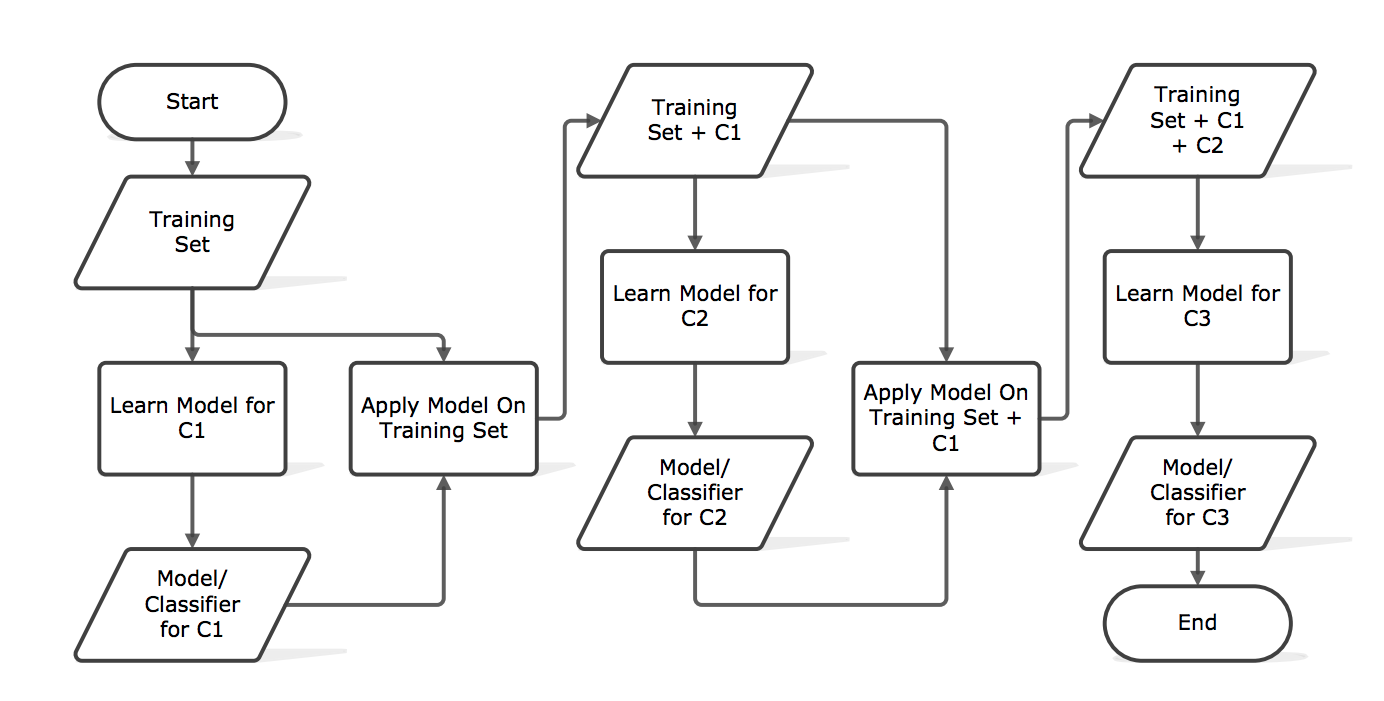

In [ ]:
# install.packages(c("mlr", "OpenML"))
# install.packages("farff")
# library(mlr)
# library(OpenML)
# library(farff)
# other way wo installation
# install.packages("mlr", repos=c("http://rstudio.org/_packages", "http://cran.rstudio.com",dependencies=TRUE)) 

In [105]:
setOMLConfig(apikey = "c1994bdb7ecb3c6f3c8f3b35f4b47f1f") #read only api key
oml.id = listOMLDataSets(tag = "2016_multilabel_r_benchmark_paper")$data.id
scene = getOMLDataSet(data.id = oml.id[8])
target = scene$target.features
feats = setdiff(colnames(scene$data), target)
head(scene$data[, c(feats[1], feats[2], target)])

OpenML configuration:
  server           : http://www.openml.org/api/v1
  cachedir         : C:\Users\himanshu\AppData\Local\Temp\RtmpWAJrCY/cache
  verbosity        : 1
  arff.reader      : farff
  confirm.upload   : TRUE
  apikey           : ***************************47f1f

Data '40595' file 'description.xml' found in cache.
Data '40595' file 'dataset.arff' found in cache.
Loading required package: readr


,Att1,Att2,Beach,Sunset,FallFoliage,Field,Mountain,Urban
0,0.646467,0.666435,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
1,0.770156,0.767255,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE
2,0.793984,0.772096,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,0.938563,0.949260,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,0.512130,0.524684,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
5,0.824623,0.886845,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE


As you can see above, one defining property of a multilabel dataset is, that the target variables (which are called labels) are binary. If you want to use your own data set, make sure to encode these variables in logical, where TRUE indicates the relevance of a label.

In [107]:
set.seed(1729)
target
scene.task = makeMultilabelTask(data = scene$data, target = target)

[1] "Beach"       "Sunset"      "FallFoliage" "Field"       "Mountain"   
[6] "Urban"

In [ ]:
binary.learner = makeLearner("classif.rpart")
lrncc = makeMultilabelClassifierChainsWrapper(binary.learner)

In [ ]:
n = getTaskSize(scene.task)
train.set = seq(1, n, by = 2)
test.set = seq(2, n, by = 2)

scene.mod.cc = train(lrncc, scene.task, subset = train.set)
scene.pred.cc = predict(scene.mod.cc, task = scene.task, subset = test.set)

In [125]:
listMeasures("multilabel")

[1] "featperc"            "multilabel.tpr"      "multilabel.hamloss" 
 [4] "multilabel.subset01" "timeboth"            "timetrain"          
 [7] "timepredict"         "multilabel.ppv"      "multilabel.f1"      
[10] "multilabel.acc"

In [110]:
performance(scene.pred.cc, measures = list(multilabel.hamloss, multilabel.subset01, multilabel.f1, multilabel.acc))

multilabel.hamloss multilabel.subset01       multilabel.f1      multilabel.acc 
          0.1318925           0.4887781           0.5785259           0.5613743

In [123]:
scene.pred.cc

Prediction: 1203 observations
predict.type: response
threshold: 
time: 0.20
   id truth.Beach truth.Sunset truth.FallFoliage truth.Field truth.Mountain
1   2        TRUE        FALSE             FALSE       FALSE          FALSE
3   4        TRUE        FALSE             FALSE       FALSE          FALSE
5   6        TRUE        FALSE             FALSE       FALSE          FALSE
7   8        TRUE        FALSE             FALSE       FALSE           TRUE
9  10        TRUE        FALSE             FALSE       FALSE          FALSE
11 12        TRUE        FALSE             FALSE       FALSE           TRUE
   truth.Urban response.Beach response.Sunset response.FallFoliage
1         TRUE          FALSE           FALSE                FALSE
3        FALSE          FALSE           FALSE                FALSE
5        FALSE          FALSE           FALSE                FALSE
7        FALSE           TRUE           FALSE                FALSE
9        FALSE          FALSE           FALSE            

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Hyperparameter Tuning

<a id = "1"></a>

# Grid Search
Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Depending on the type of model utilized, certain parameters are necessary. Grid-searching does NOT only apply to one model type. Grid-searching can be applied across machine learning to calculate the best parameters to use for any given model.

It is important to note that Grid-searching can be extremely computationally expensive and may take your machine quite a long time to run. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

**Note:** Here Grid search is demonstrated for only one model but it can be replicated across all the model with changing its respective hyperparametersm
    


**Cross Validation**<br>
The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, we make sure to split our data into a training and a testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds. We then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

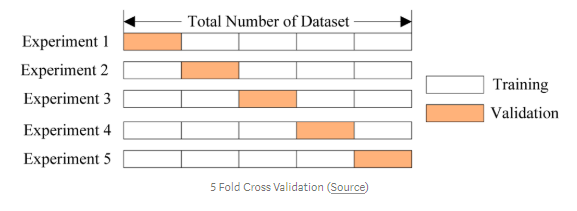

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. This sounds like an awfully tedious process! Each time we want to assess a different set of hyperparameters, we have to split our training data into K fold and train and evaluate K times. If we have 10 sets of hyperparameters and are using 5-Fold CV, that represents 50 training loops.

In [101]:
alpha=0.8
d = sort(sample(nrow(fruit), nrow(fruit)*alpha))
x = fruit[d,]
y = fruit[-d,]

#10 folds repeat 3 times
control <- trainControl(method='repeatedcv', 
                        number=10, 
                        repeats=3,
                        search = "grid")
#Metric compare model is Accuracy
metric <- "Accuracy"
set.seed(0)
#Number randomely variable selected is mtry
mtry <- sqrt(ncol(x))
tunegrid <- expand.grid(.mtry=mtry)
rf_default <- train(fruit_label~., 
                      data=x, 
                      method='rf', 
                      metric='Accuracy', 
                      tuneGrid=tunegrid, 
                      trControl=control)
rf_default

Random Forest 

47 samples
 4 predictor
 4 classes: '1', '2', '3', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 43, 42, 42, 44, 40, 43, ... 
Resampling results:

  Accuracy   Kappa    
  0.9494444  0.9179714

Tuning parameter 'mtry' was held constant at a value of 2.236068

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

<a id = "2"></a>

## Random Search Cross Validation

In [102]:
alpha=0.8
d = sort(sample(nrow(fruit), nrow(fruit)*alpha))
x = fruit[d,]
y = fruit[-d,]

#10 folds repeat 3 times
control <- trainControl(method='repeatedcv', 
                        number=10, 
                        repeats=3,
                        search = "random")
#Metric compare model is Accuracy
metric <- "Accuracy"
set.seed(0)
#Number randomely variable selected is mtry
mtry <- sqrt(ncol(x))
tunegrid <- expand.grid(.mtry=mtry)
rf_default <- train(fruit_label~., 
                      data=x, 
                      method='rf', 
                      metric='Accuracy', 
                      tuneGrid=tunegrid, 
                      trControl=control)
rf_default

Random Forest 

47 samples
 4 predictor
 4 classes: '1', '2', '3', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 43, 42, 42, 43, 43, 43, ... 
Resampling results:

  Accuracy   Kappa    
  0.9466667  0.9241236

Tuning parameter 'mtry' was held constant at a value of 2.236068

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>